# 5.8. K-Nearest Neighbours

Jedną z powszechnie używanych rodzin metod, stosowanych nie tylko na potrzeby klasyfikacji, są algorytmy oparte o sąsiedztwo wektorów danych. Wspomnieliśmy już istnienie takich możliwości w trakcie omawiania innych dostępnych metod regresji, jednakże są one na tyle interesujące, że warto omówić przynajmniej jedną z nich dokładniej.

## Odległość punktów w przestrzeni

Mając dane dwa punkty w przestrzeni 2D: $ (1, 4) $ oraz $ (-3, 2) $, jesteśmy w stanie wyliczyć ich odległość za pomocą różnych funkcji dystansu, inaczej odległości. Najpopularniejszą taką funkcją jest odległość Euklidesowa, liczona w następujący sposób:

$$ d(A, B) = \sqrt{ \sum_{i=1}^{N}{ (x_{iA} - x_{iB})^{2} } } $$

W naszym przypadku, dla dwóch ww. punktów, zapisalibyśmy to w sposób następujący:

$$ d( (1, 4), (-3, 2) ) = \sqrt{ (1 - (-3))^{2} + (4 - 2)^{2} } = \sqrt{ 4^2 + 2^2 } = \sqrt {16 + 4} = \sqrt{20} $$

Istnieje wiele innych metryk, które można wykorzystać. Więcej informacji o tym jakie warunki musi spełniać funkcja oraz jakie są inne popularne przykłady, można znaleźć na stronie: https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d

## K-Nearest Neighbours

Podstawowym algorytmem opartym o sąsiedztwo jest algorytm KNN. Jego ideą jest odnalezienie **K** najbliższych sąsiadów dla danej obserwacji, a następnie przypisanie mu klasy na podstawie najpopularniejszej etykiety w obrębie tych właśnie najbliższych wektorów. Idea jest bardzo prosta, a samo uczenie modelu niezmiernie szybkie.

In [2]:
import pandas as pd
import numpy as np

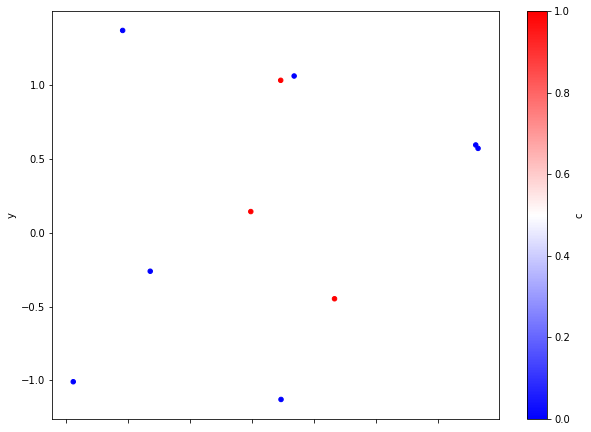

In [30]:
np.random.seed(49)

xy_df = pd.DataFrame({
    "x": np.random.normal(size=10),
    "y": np.random.normal(size=10),
    "c": np.random.choice([0, 1], size=10, 
                          p=[.75, .25])
})
xy_df.plot.scatter(x="x", y="y", c="c", cmap="bwr", 
                   figsize=(10.0, 7.5))

In [31]:
xy_df.describe()

,x,y,c
count,10.000000,10.000000,10.000000
mean,0.178074,0.191598,0.300000
std,1.093662,0.878519,0.483046
min,-1.441583,-1.128953,0.000000
25%,-0.618123,-0.401045,0.000000
50%,0.232511,0.356104,0.000000
75%,0.583764,0.921051,0.750000
max,1.822627,1.367844,1.000000


Nauczymy prosty model, który będzie dla podanego punktu na płaszczyźnie, wybierał 2 najbliższe punkty sąsiednie.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
X, y = xy_df.drop(columns="c"), xy_df["c"]

In [28]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

Wyświetlmy teraz granice decyzyjne naszego modelu, żeby zobaczyć jak podzielił on przestrzeń wejściową.

In [55]:
x_test = np.linspace(-2, 2, 1000)
y_test = np.linspace(-2, 2, 1000)

In [56]:
import matplotlib.pyplot as plt

In [57]:
xx, yy = np.meshgrid(x_test, y_test)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) \
    .reshape(xx.shape)

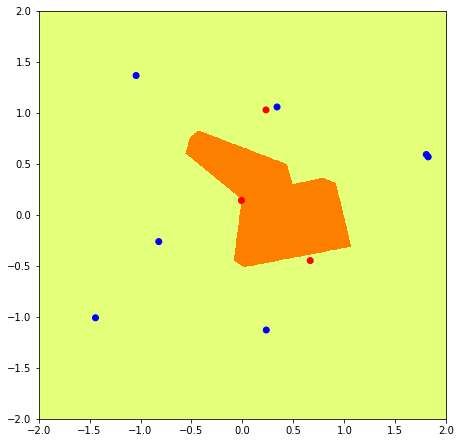

In [58]:
plt.figure(figsize=(7.5, 7.5))
plt.imshow(Z, interpolation="nearest",
           extent=(-2, 2, -2 ,2),
           cmap="Wistia", origin="lower")
plt.scatter(xy_df["x"], xy_df["y"], c=xy_df["c"],
            cmap="bwr")